In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 


import matplotlib
matplotlib.rcParams.update({'font.size': 15})

sns.set_theme(style="white", palette="pastel", font_scale=1.4)

In [2]:
data_categories = {'SNPs':"Genomics",
                   'CNV':"Genomics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genomics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "Other",
                   'WES':"Genomics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genomics",
                   'genotype':"Genomics",
                   "Copy number alterations":"Genomics",
                   "Fusions":"Genomics",
                   "Mutations":"Genomics",
                   "sc-transcriptomics":"Transcriptomics",
                   "sc-ATAC":"Epigenetics",
                   "proteome":"Proteomics"}

model_categories = {
    'VAE':"Autoencoder (variational)",
    'VNN (dense)':"Neural network (visible)",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder (variational & conditional)",
    'Graph Convolutional Network (GCN)':"Graph network (convolutional)",
    'AE (convolutional)':"Autoencoder (convolutional)",
    'LSTM (convolutional)':"LSTM (convolutional)",
    'ensemble (MAE)':"other",
    'fuzzy network':"other",
    'Gaussian-Proces':"other",
    'PCA-like':"other",
    'ANN':"Neural network",
    'VNN (CNN)':"Neural network (visible & convolutional)",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder (stacked)",
    'VAE (sparse)':"Autoencoder (variational & sparse)",
    'Convolutional Neural Network (CNN)':"Neural network (convolutional)",
    'Dense neural network':"Neural network",
    #'Transformer':"",
    'Capsule Network':"other",
    'Factor Graph Neural Network':"Graph network (factor)",
    'Self-organising maps (SOM)':"other",
    'AE (sparse)':"Autoencoder (sparse)",
    'Graph Network':"Graph network",
    "meta-learning":"other",
    np.nan:""
}

In [3]:
outPath = "figures"

pd_table1 = pd.read_csv("data/Table_5.csv")

In [4]:
plt.style.use("ggplot")

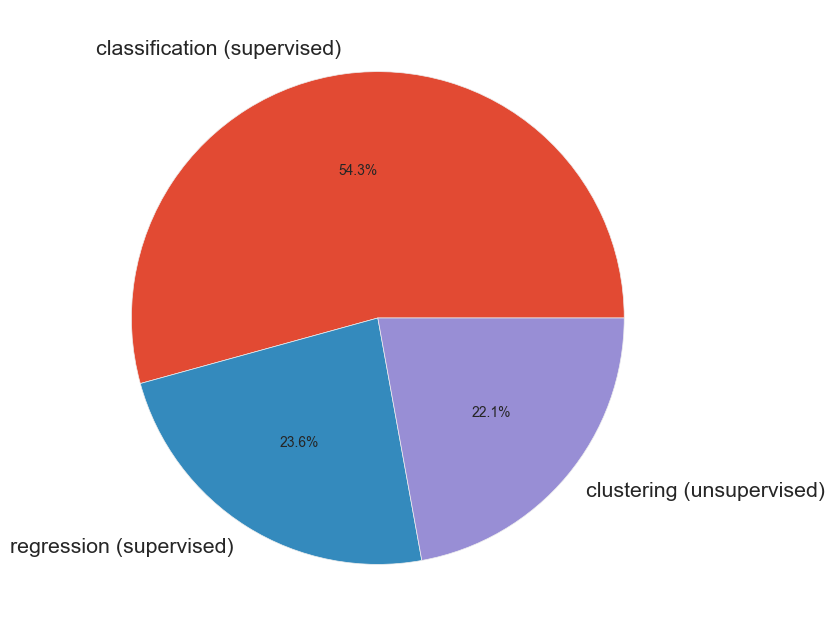

In [5]:
df = pd_table1["Task"].copy()
df = df.str.split(", ").explode()
df = df[df!="survival"]
df = df.value_counts()

labels=df.keys().tolist()

fig, ax  = plt.subplots(figsize=(8,8))
ax.pie(df.tolist(), labels=labels, autopct='%1.1f%%')
plt.show()

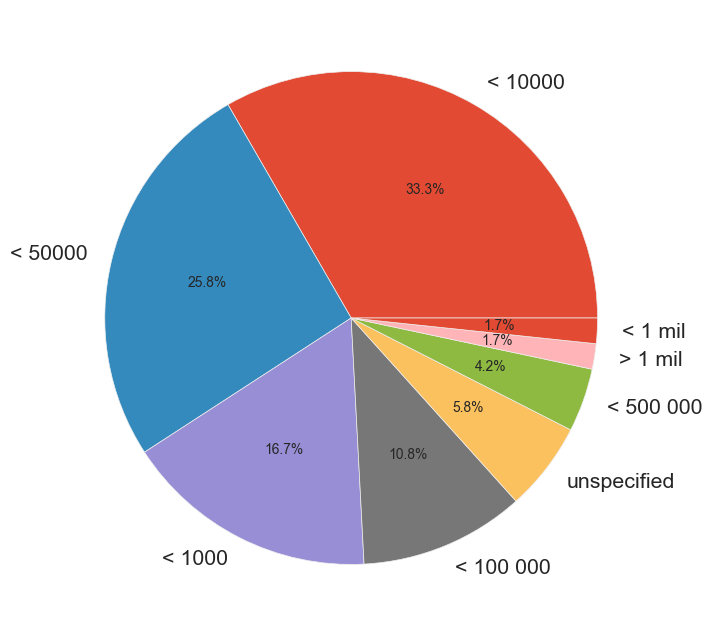

In [6]:
df = pd_table1["Inputsize"].copy()
df = df.str.split(", ").explode()
# df = df[df!="survival"]
df = df.value_counts()

labels=df.keys().tolist()

fig, ax  = plt.subplots(figsize=(8,8))
ax.pie(df.tolist(), labels=labels, autopct='%1.1f%%')
plt.show()

In [7]:
#@title Models per Datatype


df = pd_table1.copy()
df["Data_type"] = df['Data type'].str.split(', ')
df["Model_architecture"] = df['Model architecture'].str.split(', ')

df = df.explode(["Data_type"])
df = df.explode(["Model_architecture"])


df["Data_type"] = df["Data_type"].values.astype(str)

''' change naming '''
df["Model_architecture"] = df["Model_architecture"].replace(model_categories)
df["Model_architecture"] = df["Model_architecture"].values.astype(str)
df["Data_type"] = df["Data_type"].replace(data_categories)

df = df.sort_values(["Model_architecture"], ascending=True)
df = df[~df["Data type"].isna()]




In [8]:
df

,Name,Data type,Bulk/single cell,Which level,Model architecture,Passive vs. Active Approaches,Taxonomy (Table 3. Zhan et al),Post-hoc interpretation method,Interpretation strategy,Prior knowledge,...,Title,Research question,Advantage,Disadvantage,Year,Task,Applications to,Notes,Data_type,Model_architecture
64,https://www.biorxiv.org/content/10.1101/2022.0...,"CNV, CpGs (methylation), SNV, mRNA (gene expre...",Bulk,Genes,AE,passive,"attribution, semi-local",NaN,"connection-weights, other",NaN,...,Deep learning based on multi-omics integration...,Use multi-omics to predict mortality & stratif...,Uses many omics entities; clusters according t...,The choice of employed explanability method is...,2022,"classification (supervised), clustering (unsup...",Oncology,"“Olden’s approach” - Olden, J.D., Joy, M.K., D...",Proteomics,Autoencoder
23,https://arxiv.org/abs/2207.09783,"mRNA (gene expression), miRNA",Bulk,Genes,AE (vector quantized),passive,"global, hidden semantics",NaN,visualisation,NaN,...,Cancer Subtyping by Improved Transcriptomic Fe...,Cancer Subtyping,show very high clustering improvement,no feature-level interpretation; novel cluster...,2022,clustering (unsupervised),Oncology,cant find sample size and inputsize,Transcriptomics,Autoencoder
23,https://arxiv.org/abs/2207.09783,"mRNA (gene expression), miRNA",Bulk,Genes,AE (vector quantized),passive,"global, hidden semantics",NaN,visualisation,NaN,...,Cancer Subtyping by Improved Transcriptomic Fe...,Cancer Subtyping,show very high clustering improvement,no feature-level interpretation; novel cluster...,2022,clustering (unsupervised),Oncology,cant find sample size and inputsize,Epigenetics,Autoencoder
29,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,sc-transcriptomics,Single-cell,"Genes, Pathways",AE,passive,"attribution, local",NaN,backpropagation-based,Gene-Onthology,...,Interpretable Autoencoders Trained on Single C...,Demonstrate transfer learning for AE,shows autoencoder can mode a transcriptional r...,no in depth analysis on e.g. preserved genes p...,2021,clustering (unsupervised),Other,NaN,Transcriptomics,Autoencoder
30,https://www.frontiersin.org/articles/10.3389/f...,"CNV, mRNA (gene expression), proteome",Bulk,"Genes, Pathways","AE, Graph Convolutional Network (GCN)",passive,"attribution, global, hidden semantics",NaN,"connection-weights, permutation, perturbation",NaN,...,MoGCN: A Multi-Omics Integration Method Based ...,Cancer subtype classification,nicely combines two framework (GCN and AE),feature selection with AE makes use of old str...,2022,classification (supervised),Oncology,Interpretation through sensitivity analysis (G...,Genomics,Autoencoder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,https://www.pnas.org/doi/epdf/10.1073/pnas.211...,SNPs,Bulk,SNPs,"Gaussian-Proces, PCA-like",passive,"global, hidden semantics, rule",NaN,visualisation,NaN,...,Interpretable modeling of genotype–phenotype l...,model genotype phenotype landscape (epistatic ...,low dimensional space similar to PCA. Effects ...,There are still multiple dimensions. Currently...,2022,regression (supervised),covid,First they model the genotype space as a an ad...,Genomics,other
71,https://ieeexplore.ieee.org/document/4272033,"mRNA (gene expression), miRNA",Bulk,Genes,Self-organising maps (SOM),active,"global, hidden semantics",NaN,visualisation,NaN,...,2D and 3D Neural-Network Based Visualization o...,Extend visualisation into 3rd dimension with SOM,higher resolution; interactive; scales well wi...,can not capture more complex interactions,2007,clustering (unsupervised),Other,NaN,Epigenetics,other
8,https://link.springer.com/article/10.1007/s005...,CNV,Bulk,Genes,"AE (convolutional), LSTM (convolutional), ense...",passive,"attribution, local",GradCAM,backpropagation-based,NaN,...,A snapshot neural ensemble method for cancer-t...,Predict cancer using CNV,"to apply GradCAM to biological input, they sim...",derived heatmaps are useless for interpreta

In [9]:
num_architecture= pd.DataFrame(df['Model_architecture'].value_counts())
num_architecture["percent"] = (num_architecture["Model_architecture"] / num_architecture["Model_architecture"].sum() ) * 100
num_architecture = num_architecture.reset_index(names="model_type")
num_architecture

,model_type,Model_architecture,percent
0,Neural network,50,21.551724
1,Neural network (visible),34,14.655172
2,Autoencoder,32,13.793103
3,Graph network (convolutional),32,13.793103
4,Autoencoder (variational),22,9.482759
5,Transformer,12,5.172414
6,Neural network (convolutional),10,4.310345
7,Neural network (visible & convolutional),10,4.310345
8,other,10,4.310345
9,LSTM (convolutional),4,1.724138


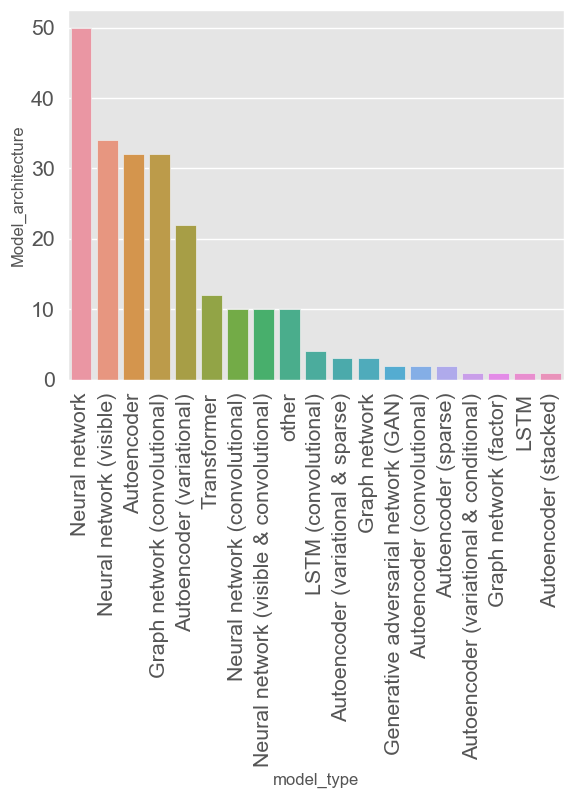

In [10]:
sns.barplot(num_architecture, x="model_type", y="Model_architecture")
plt.xticks(rotation=90)
plt.show()


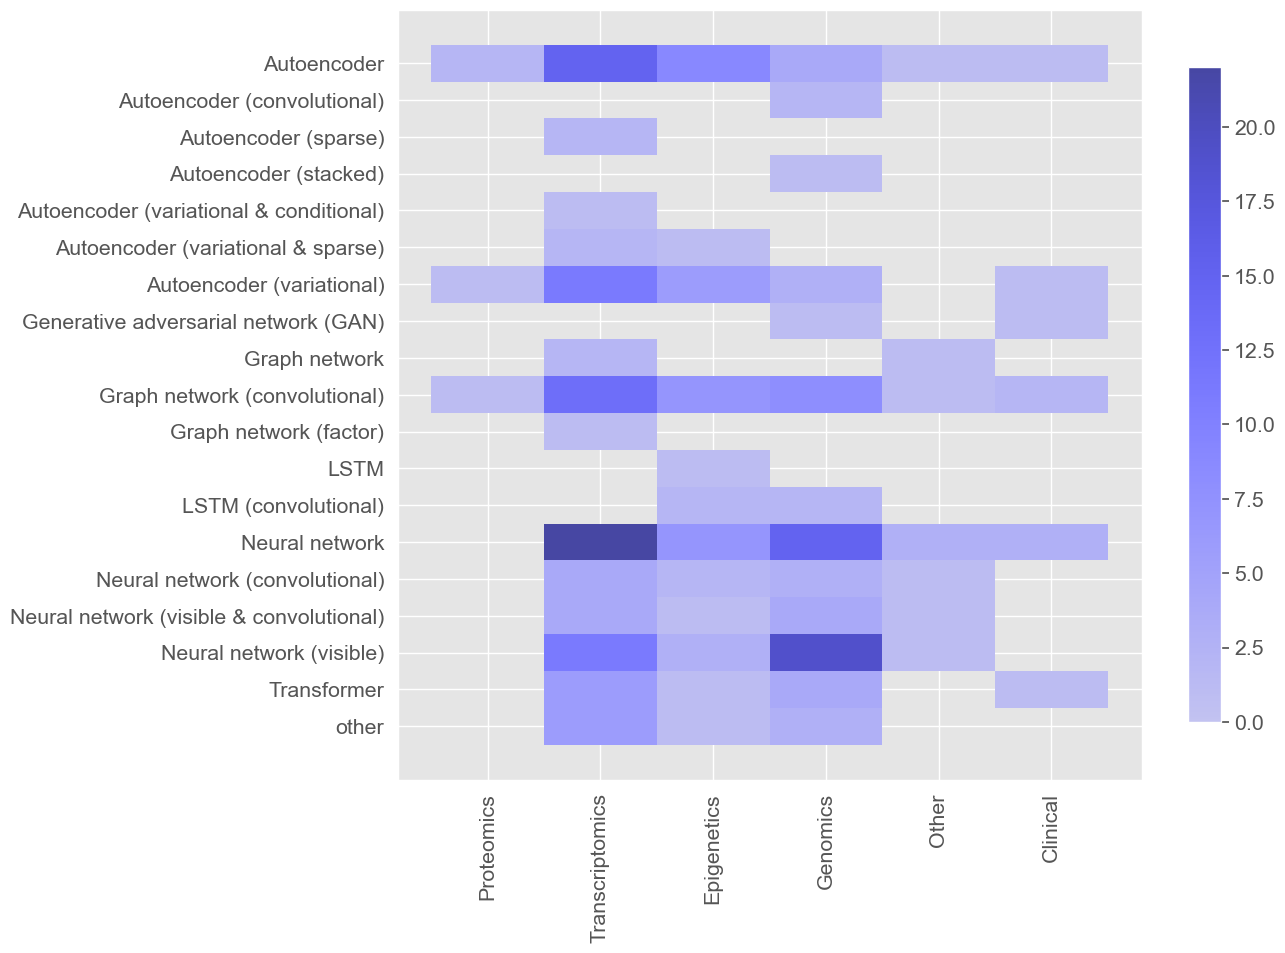

In [11]:
### Ploting
fig, ax = plt.subplots(ncols=1, figsize=(12, 10))
sns.histplot(df, x="Data_type", y ="Model_architecture", ax=ax, color="blue", cbar=True,  cbar_kws=dict(shrink=.85))
ax.set_ylabel("")
ax.set_xlabel("")


plt.xticks(rotation=90)


# plt.tight_layout()
# plt.savefig(f"{outPath}/model_dataType.png", dpi=300)
plt.show()


In [12]:
df = pd_table1.copy()
df["Data_type"] = df['Data type'].str.split(', ')
df["Model_architecture"] = df['Model architecture'].str.split(', ')

df = df.explode(["Data_type"])
df = df.explode(["Model_architecture"])


df["Data_type"] = df["Data_type"].values.astype(str)

''' change naming '''
df["Model_architecture"] = df["Model_architecture"].replace(model_categories)
df["Model_architecture"] = df["Model_architecture"].values.astype(str)
df["Data_type"] = df["Data_type"].replace(data_categories)

df = df.sort_values(["Model_architecture"], ascending=True)
df = df[~df["Data type"].isna()]


x = (df[["Data_type", "Model_architecture"]].value_counts() / df[["Data_type", "Model_architecture"]].value_counts().sum())*100
x = x.unstack().T
x

Data_type,Clinical,Epigenetics,Genomics,Other,Proteomics,Transcriptomics
Model_architecture,,,,,,
Autoencoder,0.431034,3.879310,1.724138,0.431034,0.862069,6.465517
Autoencoder (convolutional),NaN,NaN,0.862069,NaN,NaN,NaN
Autoencoder (sparse),NaN,NaN,NaN,NaN,NaN,0.862069
Autoencoder (stacked),NaN,NaN,0.431034,NaN,NaN,NaN
Autoencoder (variational & conditional),NaN,NaN,NaN,NaN,NaN,0.431034
Autoencoder (variational & sparse),NaN,0.431034,NaN,NaN,NaN,0.862069
Autoencoder (variational),0.431034,2.586207,1.293103,NaN,0.431034,4.741379
Generative adversarial network (GAN),0.431034,NaN,0.431034,NaN,NaN,NaN
Graph network,NaN,NaN,NaN,0.431034,NaN,0.862069


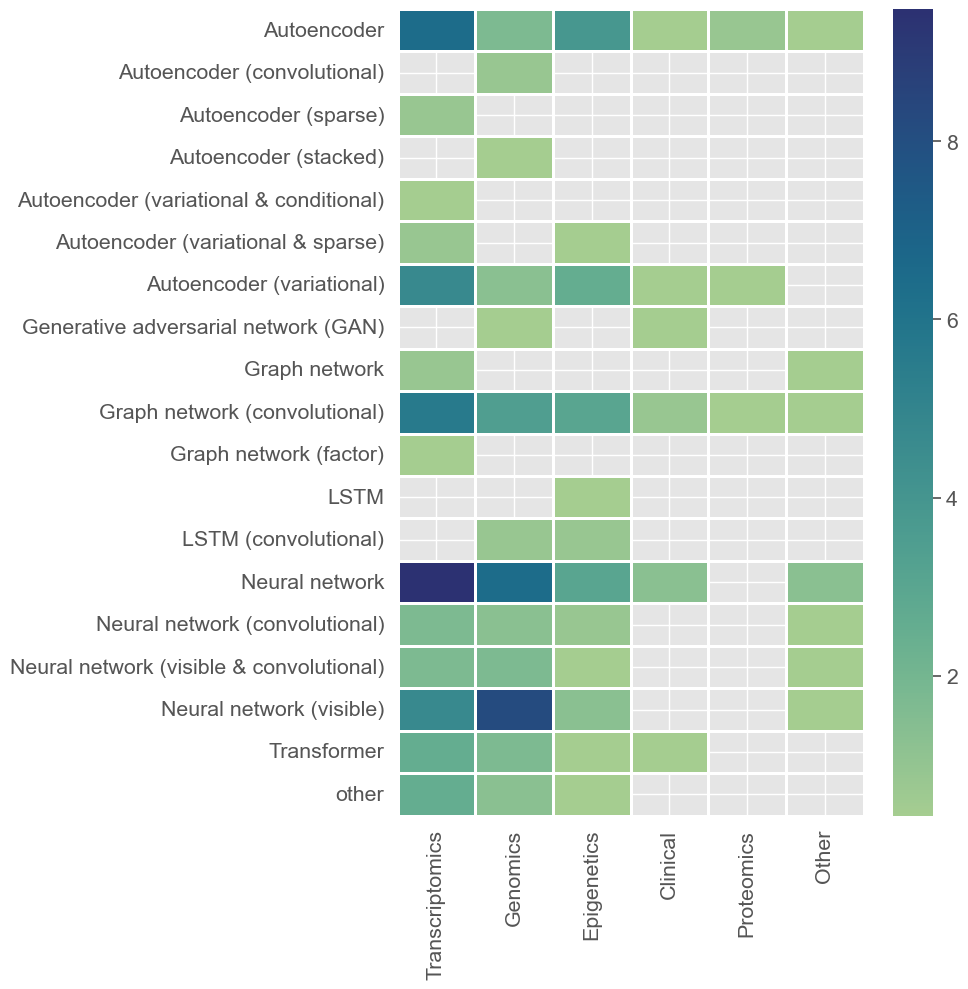

In [13]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 10))
cols = ["Transcriptomics", "Genomics", "Epigenetics", "Clinical", "Proteomics", "Other"]
x = x.loc[:,cols]
sns.heatmap(x, cmap="crest",linewidths=2)
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig(f"{outPath}/model_dataType.svg", dpi=300)